# Get started with `boxdetect.pipelines`


In [1]:
%load_ext autoreload
%autoreload 2

### Display original image

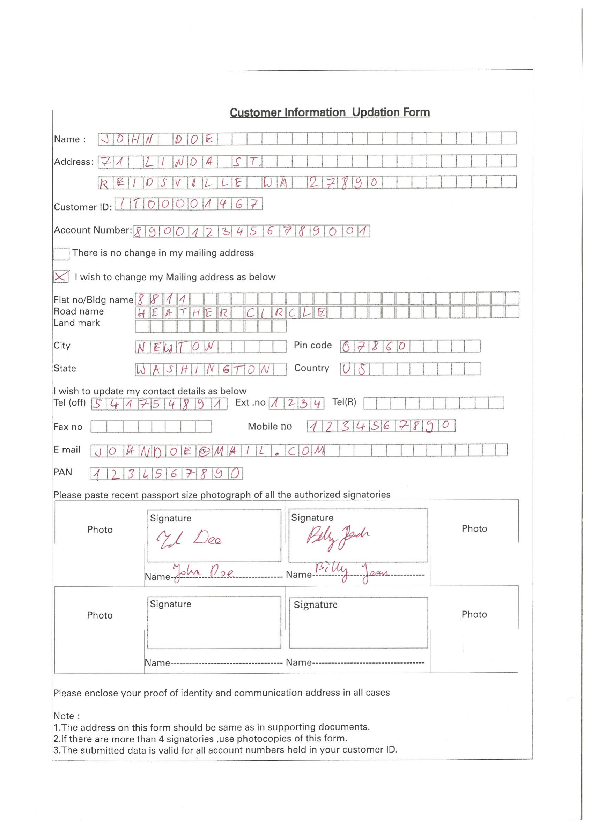

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../images/form_example1.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(input_image)
plt.show()

# Search for character boxes and group them together 

### Adjust config to work for your documents and images

In [3]:
import sys
sys.path.append("../.")
from boxdetect import config

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (30,55)
cfg.height_range = (25,40)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [0.7]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.7)

cfg.group_size_range = (1, 100)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

### Use `get_boxes` pipeline to easily get your results

In [4]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    file_path, cfg=cfg, plot=False)

Processing file:  ../images/form_example1.png


In [5]:
# Each of the returned elements are rectangular bounding boxes representing grouped character boxes (x, y, w, h)
grouping_rects

[(263, 361, 1197, 38),
 (262, 427, 1198, 37),
 (270, 488, 1190, 36),
 (311, 550, 420, 34),
 (363, 629, 677, 35),
 (132, 693, 47, 36),
 (132, 758, 45, 36),
 (369, 820, 1098, 37),
 (369, 860, 1098, 36),
 (369, 901, 432, 34),
 (369, 960, 432, 34),
 (958, 959, 398, 33),
 (369, 1024, 432, 35),
 (958, 1023, 400, 35),
 (244, 1124, 386, 33),
 (753, 1123, 155, 33),
 (1024, 1121, 400, 34),
 (242, 1189, 345, 34),
 (863, 1187, 421, 34),
 (242, 1256, 1192, 35),
 (240, 1324, 435, 33)]

### Display image with detected boxes
Green color - detected boxes  
Red color - boxes grouped together based on distance parameters

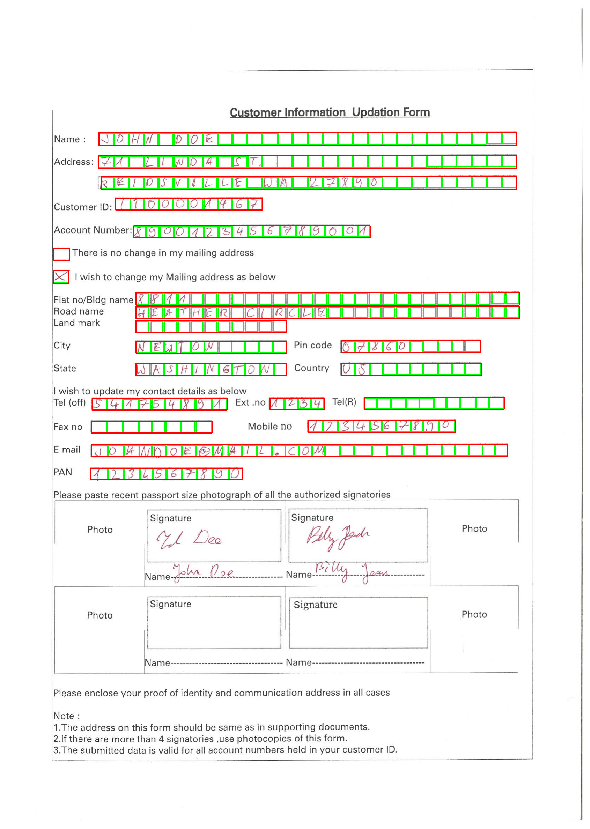

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(output_image)
plt.show()

### Display detected boxes

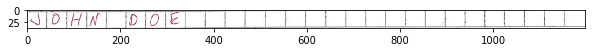

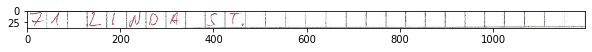

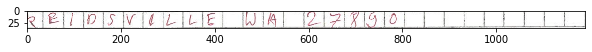

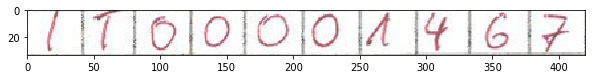

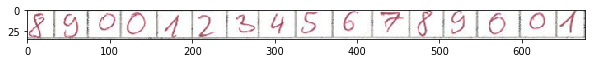

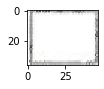

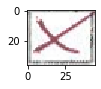

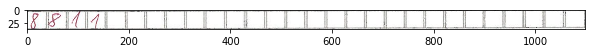

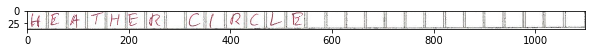

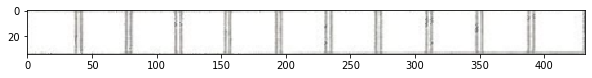

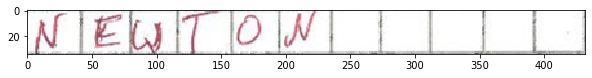

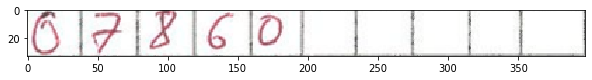

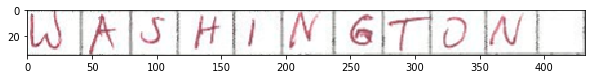

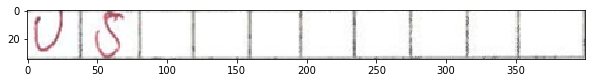

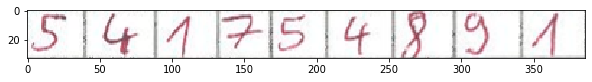

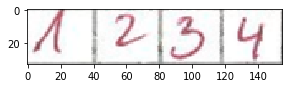

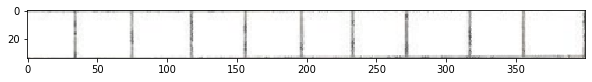

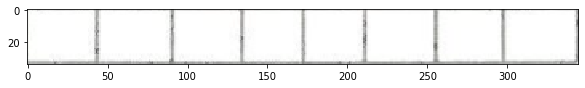

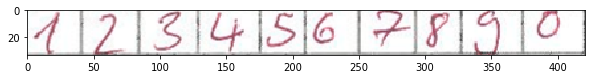

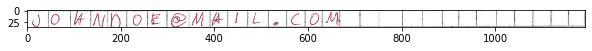

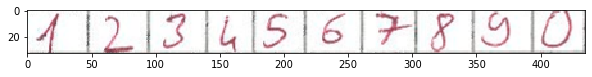

In [7]:
import cv2

org_img = cv2.imread(file_path)

for rect in grouping_rects:
    x1 = rect[0]
    x2 = x1 + rect[2]
    y1 = rect[1]
    y2 = y1 + rect[3]
    plt.figure(figsize=(10,1))
    plt.imshow(org_img[y1:y2, x1:x2])
    plt.show()

## Use `get_checkboxes` to search for checkboxes and recognize if marked/ticked/checked based on pixels presence

In [8]:
from boxdetect.pipelines import get_checkboxes

file_path = '../images/form_example1.png'

checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  ../images/form_example1.png
----------------------------------
nonzero_px_count:  3
all_px_count:  858
nonzero_px_count / all_px_count =  0.0034965034965034965
----------------------------------
----------------------------------
nonzero_px_count:  363
all_px_count:  858
nonzero_px_count / all_px_count =  0.4230769230769231
----------------------------------


### Looking into the results

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (132, 693, 47, 36)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


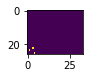

Checkbox bounding rectangle (x,y,width,height):  (132, 758, 45, 36)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


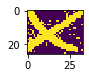

In [9]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

# Detect checkboxes for another image

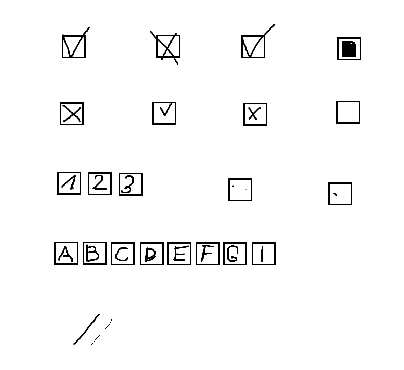

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../tests/data/dummy_example2.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(input_image)
plt.show()

### Adjust the config for the new file

In [11]:
from boxdetect import config

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (40,60)
cfg.height_range = (40,60)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [0.5]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.5)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

### Process image and get checkboxes

In [12]:
from boxdetect.pipelines import get_checkboxes

# px_threshold set to 0.1 is basically saying that every checkbox
# with more than 10% of white pixels inside should be considered as checked
checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  ../tests/data/dummy_example2.png
----------------------------------
nonzero_px_count:  289
all_px_count:  1292
nonzero_px_count / all_px_count =  0.2236842105263158
----------------------------------
----------------------------------
nonzero_px_count:  308
all_px_count:  1296
nonzero_px_count / all_px_count =  0.23765432098765432
----------------------------------
----------------------------------
nonzero_px_count:  267
all_px_count:  1224
nonzero_px_count / all_px_count =  0.2181372549019608
----------------------------------
----------------------------------
nonzero_px_count:  795
all_px_count:  1368
nonzero_px_count / all_px_count =  0.581140350877193
----------------------------------
----------------------------------
nonzero_px_count:  372
all_px_count:  1404
nonzero_px_count / all_px_count =  0.26495726495726496
----------------------------------
----------------------------------
nonzero_px_count:  173
all_px_count:  1224
nonzero_px_count / all_px_count =  

### Look into the results

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (105, 54, 52, 48)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


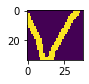

Checkbox bounding rectangle (x,y,width,height):  (292, 52, 50, 50)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


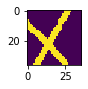

Checkbox bounding rectangle (x,y,width,height):  (456, 54, 50, 48)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


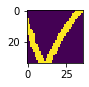

Checkbox bounding rectangle (x,y,width,height):  (643, 57, 52, 50)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


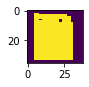

Checkbox bounding rectangle (x,y,width,height):  (100, 184, 53, 50)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


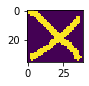

Checkbox bounding rectangle (x,y,width,height):  (283, 184, 50, 48)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


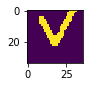

Checkbox bounding rectangle (x,y,width,height):  (461, 186, 50, 48)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


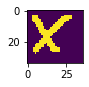

Checkbox bounding rectangle (x,y,width,height):  (641, 182, 52, 48)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


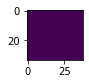

Checkbox bounding rectangle (x,y,width,height):  (430, 333, 52, 51)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


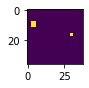

Checkbox bounding rectangle (x,y,width,height):  (627, 342, 51, 48)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


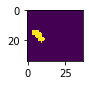

In [13]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()